### Universidad del Valle de Guatemala
#### Brandon Ronaldo Sicay Cumes - 21757
##### Exploración de Datos - Ingeniería de características 



In [26]:
# Importar la librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
# Cargar el dataset
df = pd.read_csv('dataset_feature_engineering.csv')


### **Descripción de los datos**



In [28]:
# Mostrar el dataframe
df.head()



,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [29]:

# Mostrar tipos de datos
df.dtypes


cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float64
amt_year                           float64
amt_month_s

In [30]:
# Mostrar descripcion de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

In [42]:

print(df['category'].unique())

['home' 'shopping_net' 'grocery_pos' 'misc_pos' 'gas_transport'
 'food_dining' 'shopping_pos' 'grocery_net' 'entertainment' 'misc_net'
 'personal_care' 'kids_pets' 'health_fitness' 'travel']


In [31]:

# Mostrar el conteo de las categorias
category_counts = df['category'].value_counts()
print(category_counts)


category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64


In [32]:
# Eliminar los valores nulos
df = df.dropna()


In [33]:
# Mostrar el conteo de los valores de fraude
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)


is_fraud
0    1842743
1       9651
Name: count, dtype: int64


In [35]:
df["merchant"].value_counts()


merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64

In [36]:
# Ordenar el dataset por el dia de transaccion 
df = df.sort_values(by='trans_day')


In [37]:
df["cc_num"] = df["cc_num"].astype(str)


In [38]:
df["trans_num"].value_counts(dropna=False)


trans_num
138c55217e88f4ee32ceea5f4f0b6a1b    1
76699a732528ff4f25230297035c188d    1
97b0b969aaa198f1a039873c4f397c36    1
33fbd0af7d69c7ce395e6638d8081942    1
a8c2a3e534ebd232b3035a8cc0c1857f    1
                                   ..
50d0679cae197661ef20a03b4e20278f    1
70d6164e9e82251d24cf62625f8cb376    1
5bf70f68f7d7128e894ce24d7c94d502    1
63c1c3bc62257dabcb3ee8317cb42f45    1
f897c55c3a8ea1482c69915cf47f4ada    1
Name: count, Length: 1852394, dtype: int64

In [43]:
df.head()


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
462003,4355790796238264643,fraud_Gulgowski LLC,home,58.03,Tanner,Davis,M,2632 Stevens Light Apt. 213,Payson,IL,...,False,114.281438,7,0,19,2019,4,2,1,3
690177,180014262259255,"fraud_Schmeler, Bashirian and Price",shopping_net,2.00,Brianna,Page,F,0043 Henry Plaza,Brantley,AL,...,True,78.624226,10,0,9,2019,2,1,1,1
690178,38199021865320,fraud_O'Keefe-Hudson,grocery_pos,95.54,Jesse,Roberts,M,8415 Vaughn Squares Apt. 788,Acworth,NH,...,True,101.265006,10,0,9,2019,6,1,1,3
690179,6573561108825071,fraud_Block Group,misc_pos,83.27,Kristina,Lewis,F,5449 Brandi Heights Apt. 111,Tulsa,OK,...,True,89.405920,10,0,9,2019,4,1,1,2
690180,60423098130,fraud_Cummings LLC,gas_transport,32.56,Jason,Gray,M,875 Amy Point,Amorita,OK,...,True,65.454962,10,0,9,2019,1,1,1,1


In [40]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)


cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
t

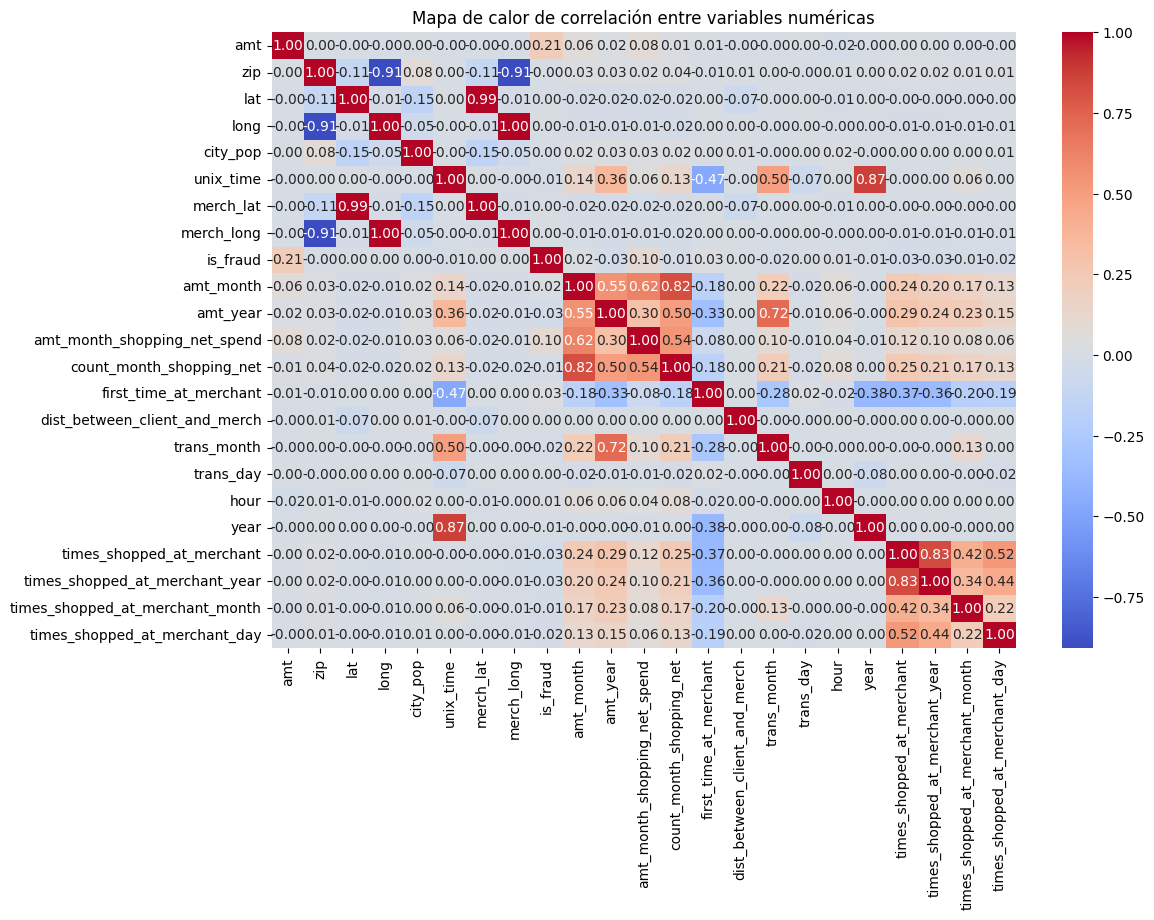

In [46]:

# Calcula la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Gráfico de mapa de calor de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

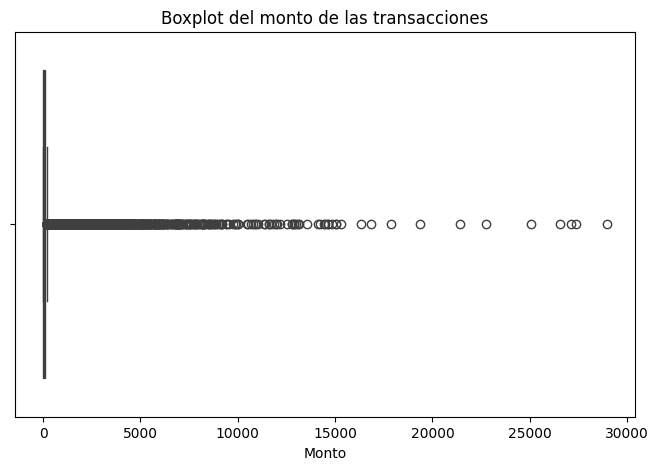

In [47]:
# Boxplot del monto de las transacciones para detectar outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='amt', data=df)
plt.title('Boxplot del monto de las transacciones')
plt.xlabel('Monto')
plt.show()


/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_11971/4268073085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='is_fraud', y='amt', data=df, palette='muted')


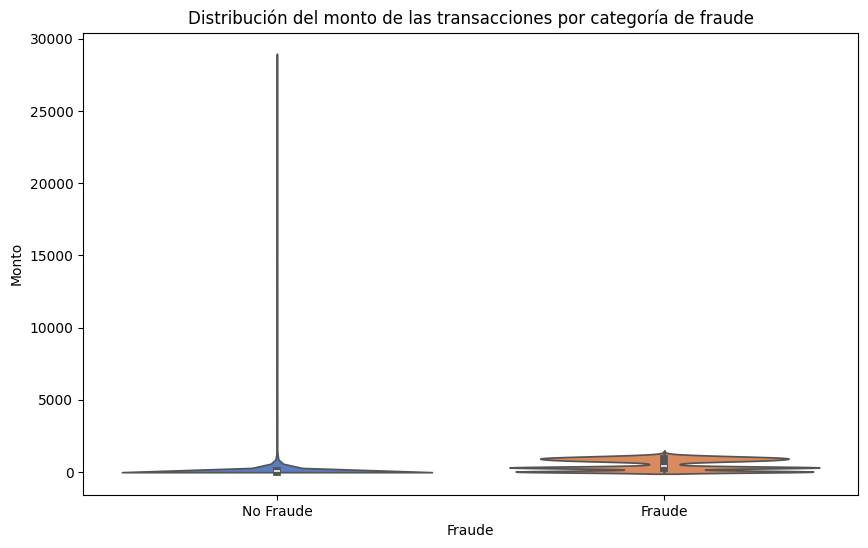

In [48]:
# Gráfico de violín del monto de las transacciones por categoría de fraude
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_fraud', y='amt', data=df, palette='muted')
plt.title('Distribución del monto de las transacciones por categoría de fraude')
plt.xlabel('Fraude')
plt.ylabel('Monto')
plt.xticks(ticks=[0, 1], labels=['No Fraude', 'Fraude'])
plt.show()


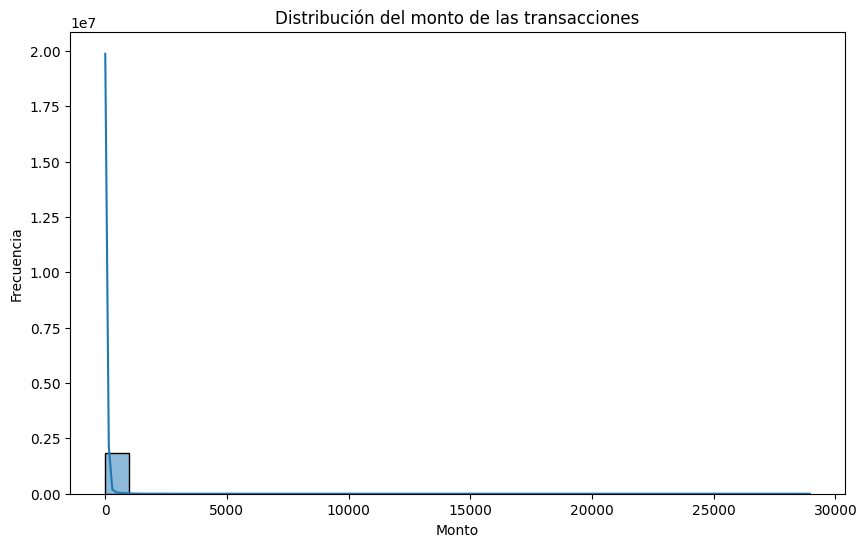

In [49]:
# Histograma de la distribución de la cantidad de transacciones
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=30, kde=True)
plt.title('Distribución del monto de las transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()


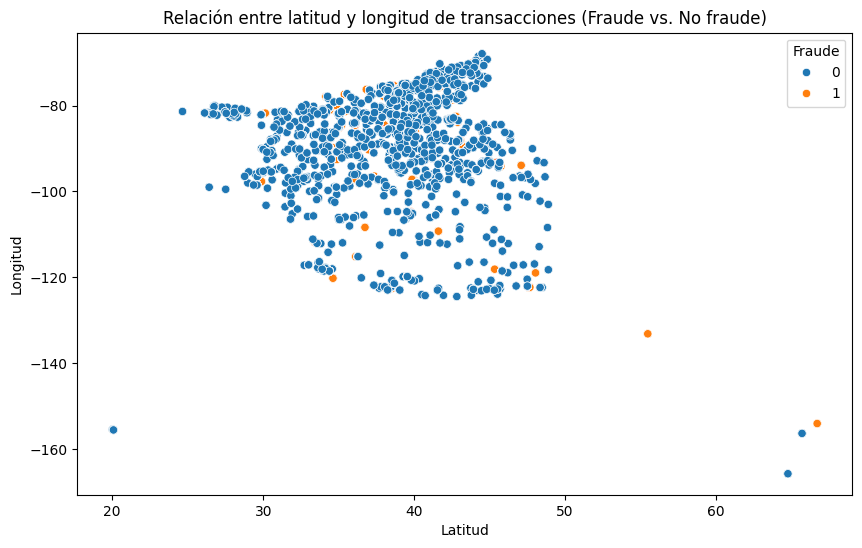

In [50]:
# Gráfico de dispersión para la relación entre latitud y longitud de la transacción
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='long', data=df, hue='is_fraud')
plt.title('Relación entre latitud y longitud de transacciones (Fraude vs. No fraude)')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend(title='Fraude')
plt.show()


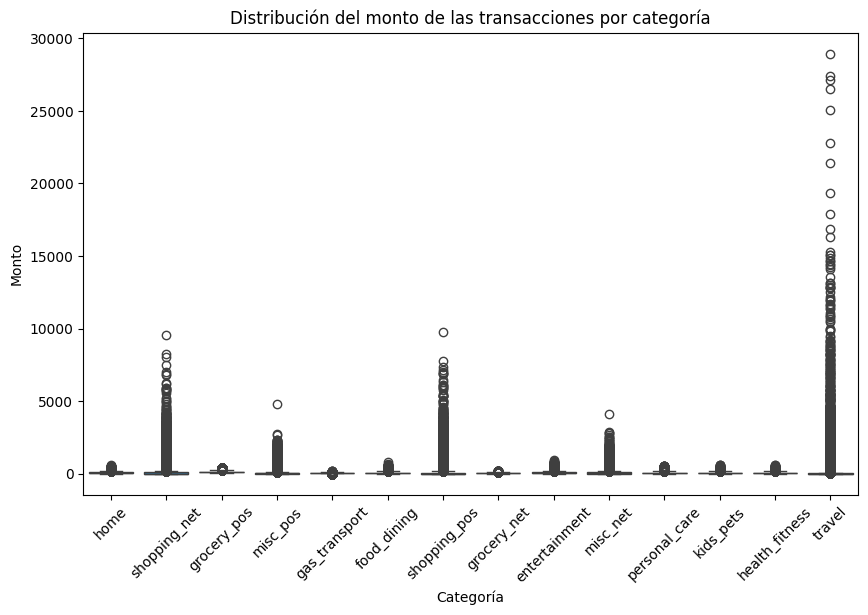

In [51]:
# Boxplot del monto de las transacciones por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='amt', data=df)
plt.title('Distribución del monto de las transacciones por categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto')
plt.xticks(rotation=45)
plt.show()


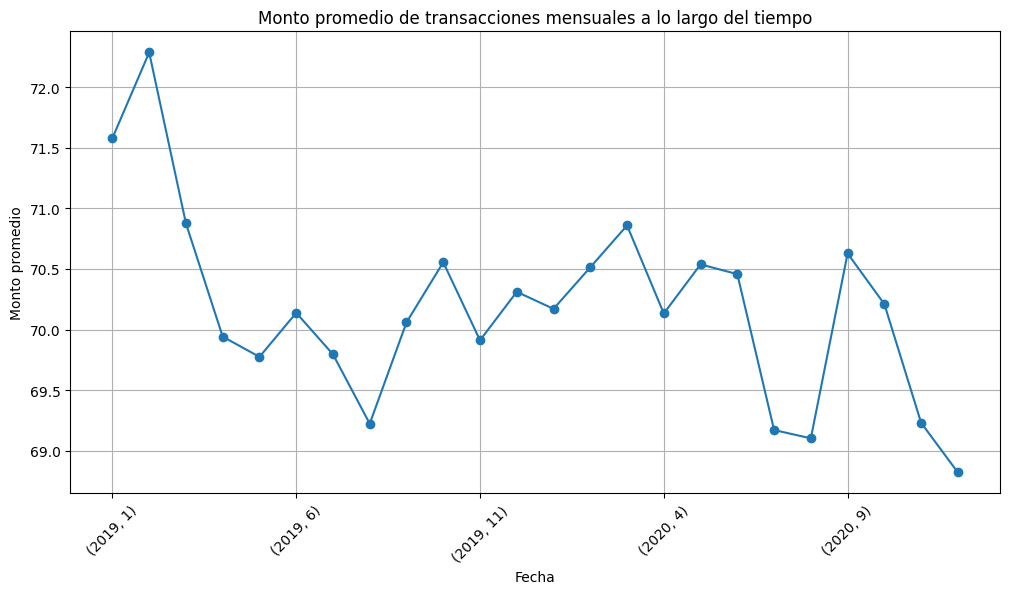

In [53]:
# Convertir 'trans_date_trans_time' a formato de fecha y hora

plt.figure(figsize=(12, 6))
df.groupby(['year', 'trans_month'])['amt'].mean().plot(marker='o')
plt.title('Monto promedio de transacciones mensuales a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


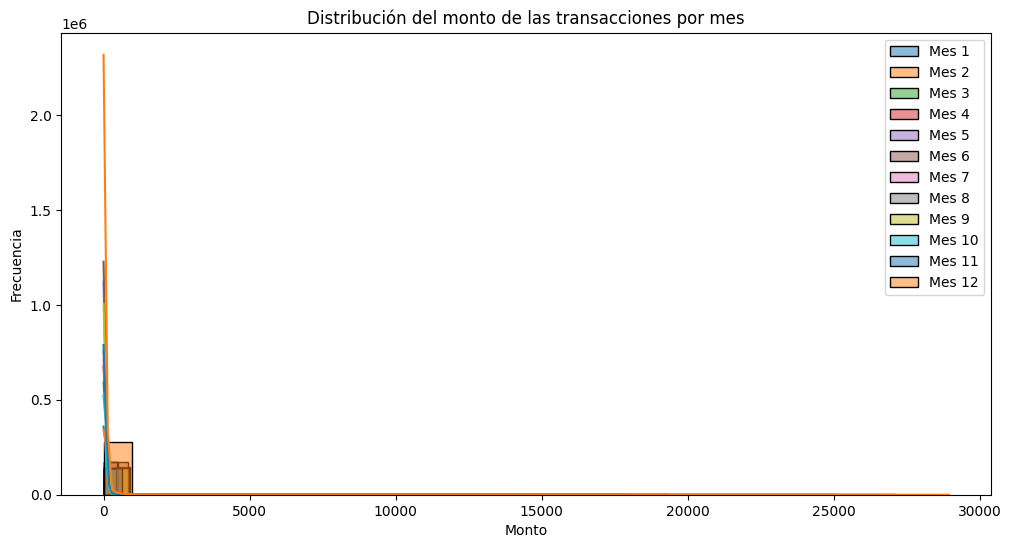

In [55]:
# Histograma del monto de las transacciones por mes
plt.figure(figsize=(12, 6))
for month in range(1, 13):
    df_month = df[df['trans_month'] == month]
    sns.histplot(df_month['amt'], bins=30, kde=True, label=f'Mes {month}', alpha=0.5)
plt.title('Distribución del monto de las transacciones por mes')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

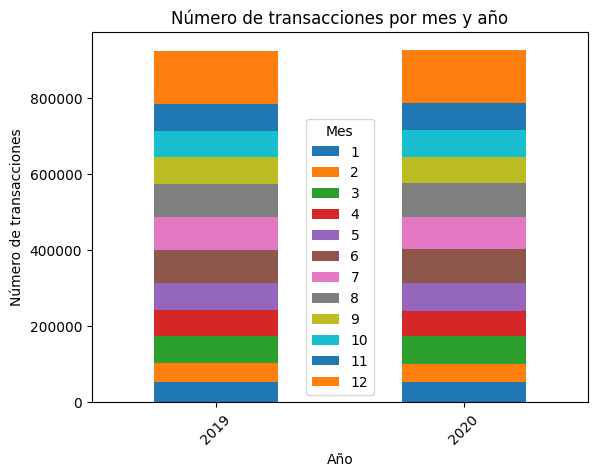

In [57]:
# Gráfico de barras del número de transacciones por mes y año
plt.figure(figsize=(12, 6))
transacciones_por_mes_y_anio = df.groupby(['year', 'trans_month']).size().unstack()
transacciones_por_mes_y_anio.plot(kind='bar', stacked=True)
plt.title('Número de transacciones por mes y año')
plt.xlabel('Año')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.legend(title='Mes')
plt.show()


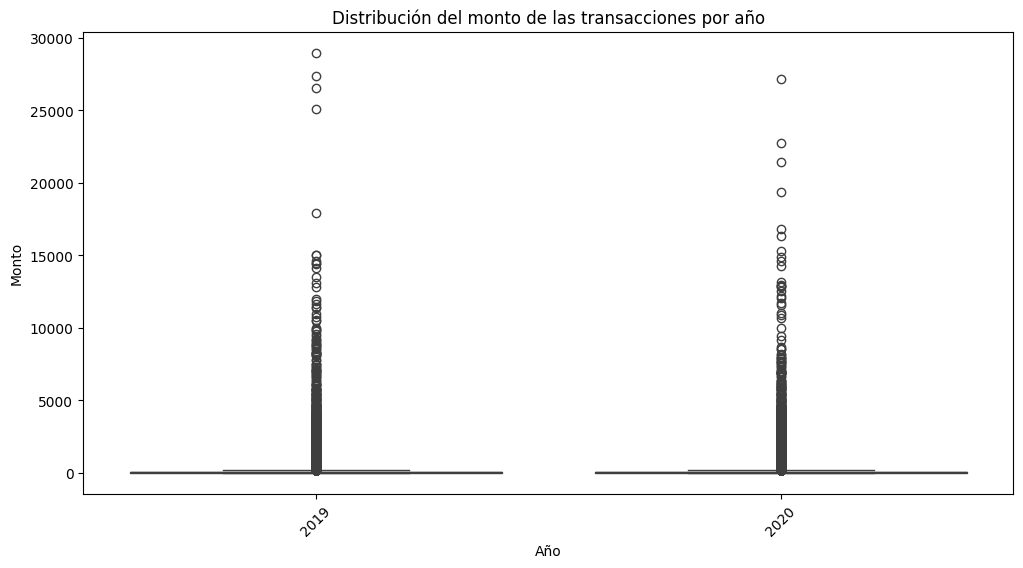

In [58]:
# Boxplot del monto de las transacciones por año
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='amt', data=df)
plt.title('Distribución del monto de las transacciones por año')
plt.xlabel('Año')
plt.ylabel('Monto')
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

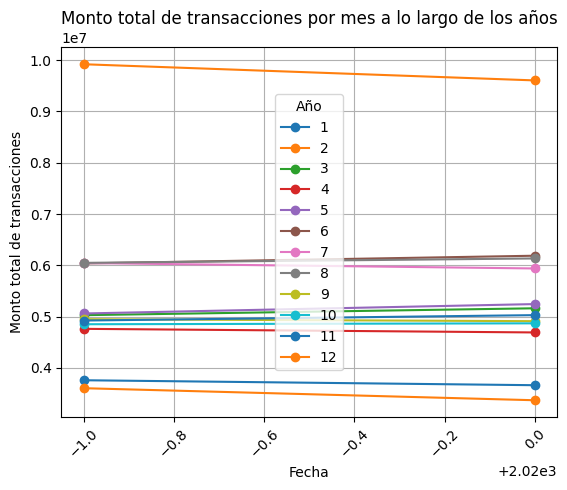

In [60]:
# Gráfico de líneas del monto total de transacciones por mes a lo largo de los años
monto_total_por_mes_y_anio = df.groupby(['year', 'trans_month'])['amt'].sum().unstack()
plt.figure(figsize=(12, 6))
monto_total_por_mes_y_anio.plot(marker='o')
plt.title('Monto total de transacciones por mes a lo largo de los años')
plt.xlabel('Fecha')
plt.ylabel('Monto total de transacciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Año')
plt.show()


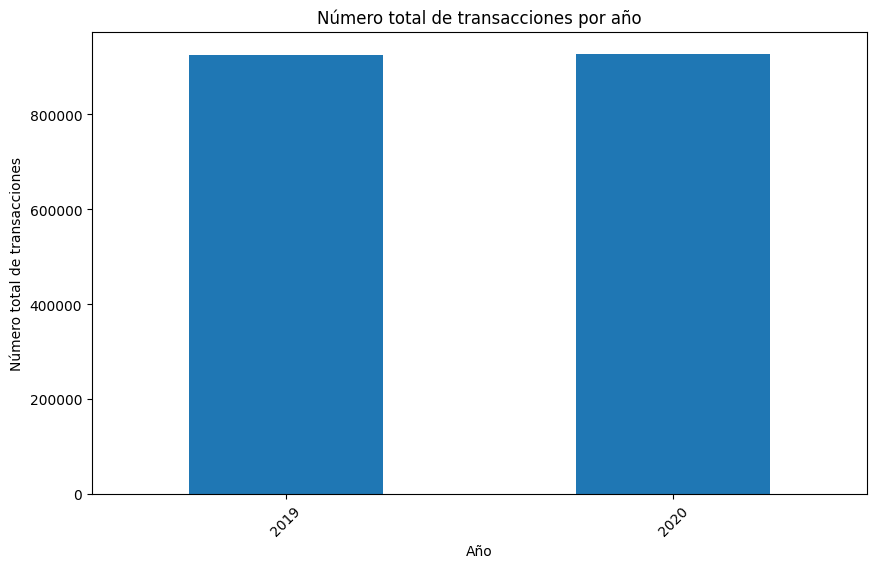

In [61]:
# Gráfico de barras del número total de transacciones por año
transacciones_totales_por_anio = df.groupby('year').size()
plt.figure(figsize=(10, 6))
transacciones_totales_por_anio.plot(kind='bar')
plt.title('Número total de transacciones por año')
plt.xlabel('Año')
plt.ylabel('Número total de transacciones')
plt.xticks(rotation=45)
plt.show()


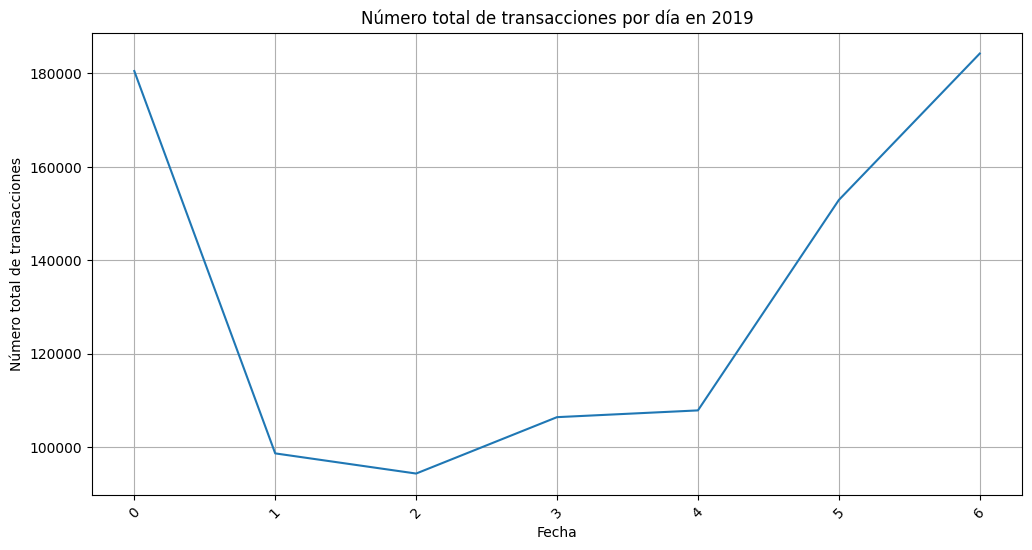

In [69]:
# Gráfico de línea del número total de transacciones por día durante un período de tiempo específico  - se utilizara 2019

transacciones_por_dia_2019 = df[df['year'] == 2019].groupby('trans_day').size()
plt.figure(figsize=(12, 6))
transacciones_por_dia_2019.plot()
plt.title('Número total de transacciones por día en 2019')
plt.xlabel('Fecha')
plt.ylabel('Número total de transacciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



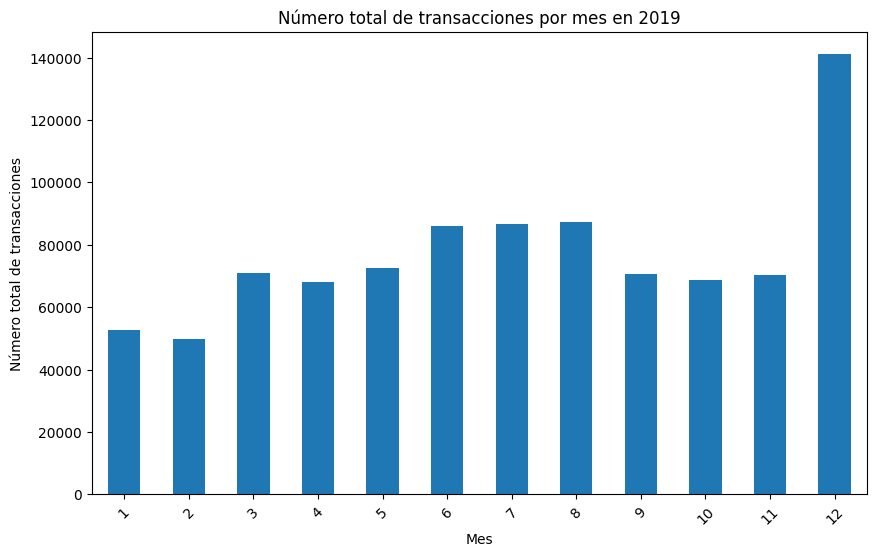

In [71]:
# Gráfico de barras del número total de transacciones por mes para un año específico
transacciones_por_mes_2019 = df[df['year'] == 2019].groupby('trans_month').size()
plt.figure(figsize=(10, 6))
transacciones_por_mes_2019.plot(kind='bar')
plt.title('Número total de transacciones por mes en 2019')
plt.xlabel('Mes')
plt.ylabel('Número total de transacciones')
plt.xticks(rotation=45)
plt.show()


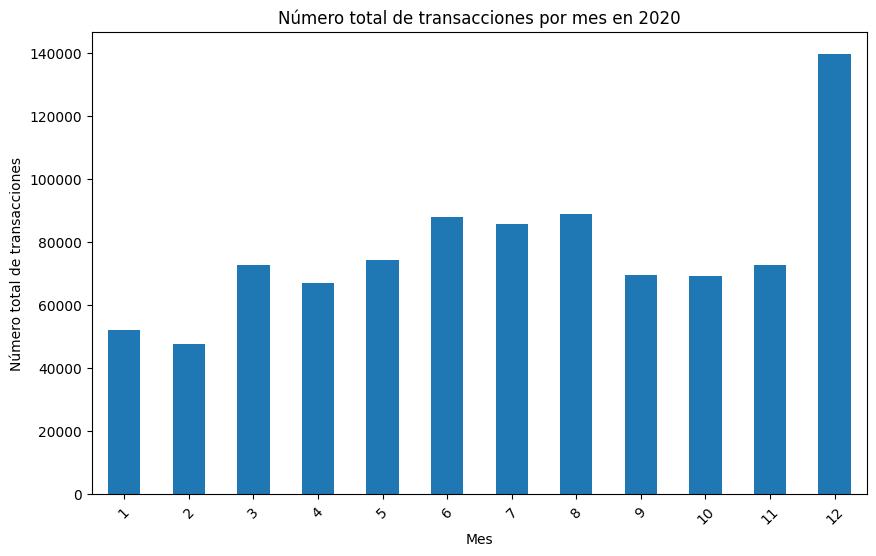

In [72]:
# Gráfico de barras del número total de transacciones por mes para un año específico
transacciones_por_mes_2019 = df[df['year'] == 2020].groupby('trans_month').size()
plt.figure(figsize=(10, 6))
transacciones_por_mes_2019.plot(kind='bar')
plt.title('Número total de transacciones por mes en 2020')
plt.xlabel('Mes')
plt.ylabel('Número total de transacciones')
plt.xticks(rotation=45)
plt.show()



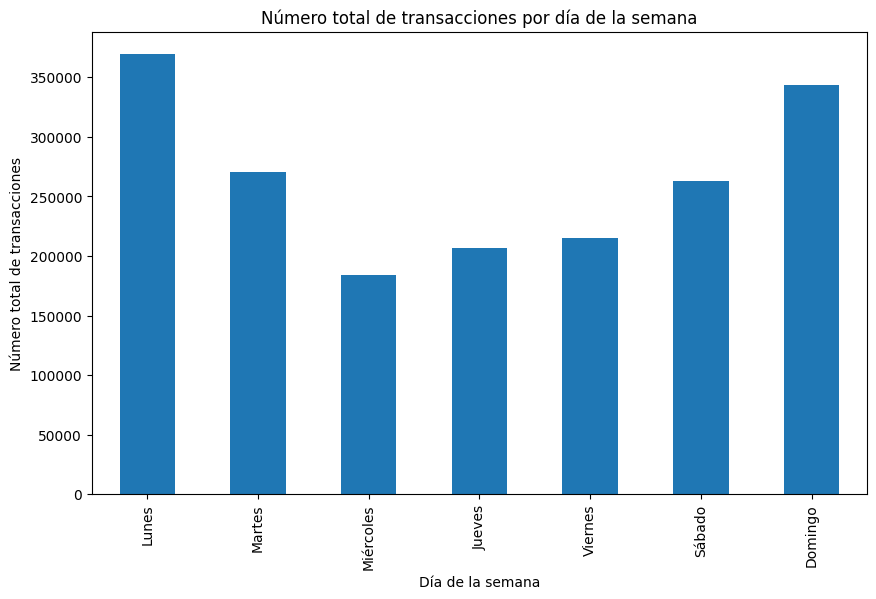

In [74]:
#  Gráfico de barras del número total de transacciones por día de la semana
df['day_of_week'] = df['trans_day']
transacciones_por_dia_semana = df.groupby('day_of_week').size()
plt.figure(figsize=(10, 6))
transacciones_por_dia_semana.plot(kind='bar')
plt.title('Número total de transacciones por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número total de transacciones')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.show()

/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_11971/1795422860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['semester'] = (df['trans_month'] - 1) // 6 + 1
/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_11971/1795422860.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['semester'] = (df['trans_month'] - 1) // 6 + 1


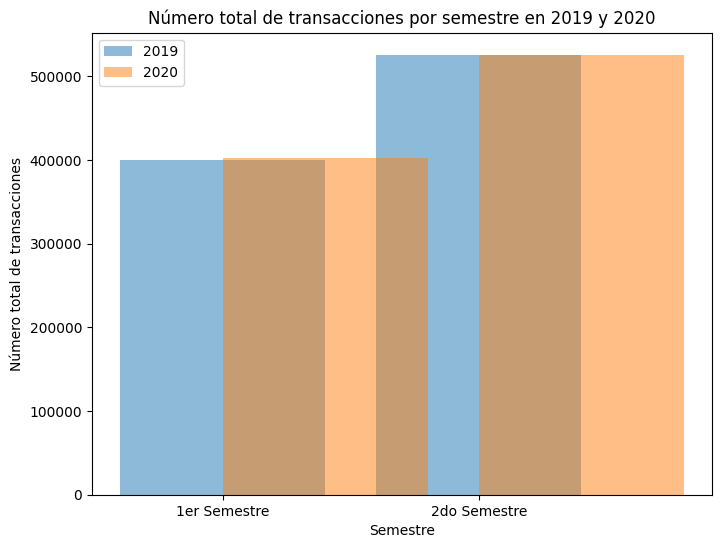

Semestre con más transacciones en 2019: 2do Semestre
Semestre con más transacciones en 2020: 2do Semestre


In [78]:

# Filtrar los datos por año 2019 y 2020
df_2019 = df[df['year'] == 2019]
df_2020 = df[df['year'] == 2020]

# Calcular el semestre a partir de los datos de fecha
df_2019['semester'] = (df['trans_month'] - 1) // 6 + 1
df_2020['semester'] = (df['trans_month'] - 1) // 6 + 1


# Agrupar los datos por semestre y contar el número de transacciones para cada año
transacciones_por_semestre_2019 = df_2019.groupby('semester').size()
transacciones_por_semestre_2020 = df_2020.groupby('semester').size()

# Encontrar el semestre con más transacciones para cada año
semestre_mas_transacciones_2019 = transacciones_por_semestre_2019.idxmax()
semestre_mas_transacciones_2020 = transacciones_por_semestre_2020.idxmax()

# Graficar el número total de transacciones por semestre en 2019 y 2020
plt.figure(figsize=(8, 6))
plt.bar(transacciones_por_semestre_2019.index, transacciones_por_semestre_2019, label='2019', alpha=0.5)
plt.bar(transacciones_por_semestre_2020.index + 0.4, transacciones_por_semestre_2020, label='2020', alpha=0.5)
plt.title('Número total de transacciones por semestre en 2019 y 2020')
plt.xlabel('Semestre')
plt.ylabel('Número total de transacciones')
plt.xticks(ticks=[1, 2], labels=['1er Semestre', '2do Semestre'])
plt.legend()
plt.show()

# Imprimir el semestre con más transacciones para cada año
print(f"Semestre con más transacciones en 2019: {['1er Semestre', '2do Semestre'][semestre_mas_transacciones_2019 - 1]}")
print(f"Semestre con más transacciones en 2020: {['1er Semestre', '2do Semestre'][semestre_mas_transacciones_2020 - 1]}")


### **Transformación y creación de nuevas variables**



In [81]:
def get_amount_month_by_card(group):
    """
    Calculate the cumulative sum of transaction amounts per month for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'amt_month' representing
    the cumulative sum of transaction amounts per month for each credit card.
    """
    group['amt_month'] = group.groupby([group['year'], group['trans_month']])['amt'].cumsum()
    return group

df = df.groupby('cc_num').apply(get_amount_month_by_card).reset_index(drop=True)



/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_11971/2313344680.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('cc_num').apply(get_amount_month_by_card).reset_index(drop=True)


In [83]:

def get_amount_anual_by_card(group):
    """
    Calculate the cumulative sum of transaction amounts per year for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'amt_year' representing
    the cumulative sum of transaction amounts per year for each credit card.
    """
    group['amt_year'] = group.groupby(group['year'])['amt'].cumsum()
    return group

df = df.groupby('cc_num').apply(get_amount_anual_by_card).reset_index(drop=True)



/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_11971/2753179243.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('cc_num').apply(get_amount_anual_by_card).reset_index(drop=True)


In [84]:
def get_amount_month_by_card_shopping_net_spend(group):
    """
    Calculate the cumulative monthly spending on shopping_net category for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'amt_month_shopping_net_spend' representing
    the cumulative monthly spending on shopping_net category for each credit card.
    """

    # Crear columna y_month como Periodo tipo 'M' a partir de year y trans_month
    group['y_month'] = pd.PeriodIndex(year=group['year'], month=group['trans_month'], freq='M')
    
    # Filtrar solo las transacciones de categoría shopping_net
    subset_shopping_net = group[group['category'] == 'shopping_net']

    # Calcular el cumsum por mes
    group['amt_month_shopping_net_spend'] = subset_shopping_net.groupby(group['y_month'])['amt'].cumsum()

    # Rellenar valores mes a mes
    for y_month in year_month:
        period = pd.Period(y_month, freq='M')
        group.loc[group['y_month'] == period, 'amt_month_shopping_net_spend'] = group.loc[group['y_month'] == period, 'amt_month_shopping_net_spend'].fillna(method='ffill')
        group.loc[group['y_month'] == period, 'amt_month_shopping_net_spend'] = group.loc[group['y_month'] == period, 'amt_month_shopping_net_spend'].fillna(0)

    return group.drop('y_month', axis=1)


In [86]:
def get_count_trx_month_by_card_shopping_net(group):
    """
    Calculate the cumulative count of transactions in the shopping_net category per month for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'count_month_shopping_net' representing
    the cumulative count of transactions in the shopping_net category per month for each credit card.
    """

    # Crear columna y_month como Period (año-mes)
    group['y_month'] = pd.PeriodIndex(year=group['year'], month=group['trans_month'], freq='M')

    # Filtrar solo shopping_net
    subset_shopping_net = group[group['category'] == 'shopping_net']

    # Calcular el contador acumulado de transacciones por mes
    group['count_month_shopping_net'] = subset_shopping_net.groupby(group['y_month']).cumcount() + 1

    # Rellenar valores mes a mes
    for y_month in year_month:
        period = pd.Period(y_month, freq='M')
        group.loc[group['y_month'] == period, 'count_month_shopping_net'] = group.loc[group['y_month'] == period, 'count_month_shopping_net'].fillna(method='ffill')
        group.loc[group['y_month'] == period, 'count_month_shopping_net'] = group.loc[group['y_month'] == period, 'count_month_shopping_net'].fillna(0)

    return group.drop('y_month', axis=1)


In [87]:
def is_first_time_transaction_at_merchant(group):
    """
    Determine if a transaction is the first time at a merchant for each credit card.

    Parameters:
    - group (DataFrame): A group of transactions for a specific credit card.

    Returns:
    DataFrame: The input DataFrame with an additional column 'first_time_at_merchant' indicating
    whether each transaction is the first time at the merchant for each credit card.
    """
    group['first_time_at_merchant'] = ~group.duplicated(subset=['merchant', 'cc_num'])
    return group

df = df.groupby('cc_num').apply(is_first_time_transaction_at_merchant).reset_index(drop=True)


/var/folders/cy/x57dh4ds2g123w7nj93wcf_c0000gn/T/ipykernel_11971/1486978825.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('cc_num').apply(is_first_time_transaction_at_merchant).reset_index(drop=True)


In [89]:
def get_amount_month_by_card(group, category):
    # Construir el periodo mensual desde las columnas year y trans_month
    group['y_month'] = pd.PeriodIndex(year=group['year'], month=group['trans_month'], freq='M')
    
    # Filtrar por categoría
    subset_category = group[group['category'] == category]

    # Acumulado de montos por mes
    group[f'amt_month_{category}_spend'] = subset_category.groupby(group['y_month'])['amt'].cumsum()

    # Rellenar por mes
    for y_month in year_month:
        period = pd.Period(y_month, freq='M')
        mask = group['y_month'] == period
        col = f'amt_month_{category}_spend'
        group.loc[mask, col] = group.loc[mask, col].fillna(method='ffill')
        group.loc[mask, col] = group.loc[mask, col].fillna(0)

    return group.drop('y_month', axis=1)


In [90]:
def get_amount_month_by_card(group, category):
    # Construir el periodo mensual desde las columnas year y trans_month
    group['y_month'] = pd.PeriodIndex(year=group['year'], month=group['trans_month'], freq='M')
    
    # Filtrar por categoría
    subset_category = group[group['category'] == category]

    # Acumulado de montos por mes
    group[f'amt_month_{category}_spend'] = subset_category.groupby(group['y_month'])['amt'].cumsum()

    # Rellenar por mes
    for y_month in year_month:
        period = pd.Period(y_month, freq='M')
        mask = group['y_month'] == period
        col = f'amt_month_{category}_spend'
        group.loc[mask, col] = group.loc[mask, col].fillna(method='ffill')
        group.loc[mask, col] = group.loc[mask, col].fillna(0)

    return group.drop('y_month', axis=1)


In [99]:
print(df[(df['trans_day'] == 0) | (df['trans_month'] == 0)])


                  cc_num                           merchant        category  \
0        180011453250192    fraud_Ruecker, Beer and Collier    shopping_net   
1        180011453250192             fraud_Torphy-Kertzmann  health_fitness   
2        180011453250192                  fraud_Block Group        misc_pos   
3        180011453250192                 fraud_Torp-Labadie   gas_transport   
4        180011453250192  fraud_Hyatt, Russel and Gleichner  health_fitness   
...                  ...                                ...             ...   
1849419     676372984911      fraud_Weber, Thiel and Hammes       kids_pets   
1849420     676372984911  fraud_Romaguera, Wehner and Tromp       kids_pets   
1849421     676372984911                  fraud_Mraz-Herzog   gas_transport   
1849422     676372984911       fraud_Lind, Huel and McClure   gas_transport   
1849423     676372984911               fraud_Kutch and Sons     grocery_pos   

            amt  first     last gender             

In [103]:
df.head(300)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,is_weekend,is_night,trans_date_trans_time
407,180011453250192,fraud_Bahringer-Larson,grocery_net,54.45,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,0,2019,2,1,1,1,0,1,2019-01-01 00:00:00
380,180011453250192,"fraud_Nitzsche, Kessler and Wolff",shopping_pos,115.24,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,2,2019,10,7,1,2,0,1,2019-01-01 02:00:00
847,180011453250192,"fraud_Schmeler, Bashirian and Price",shopping_net,94.56,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,2,2019,2,2,1,1,0,1,2019-01-01 02:00:00
846,180011453250192,fraud_Paucek-Wiza,grocery_net,61.94,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,3,2019,1,1,1,1,0,1,2019-01-01 03:00:00
849,180011453250192,fraud_Murray-Smitham,grocery_pos,115.09,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,4,2019,9,2,2,1,0,1,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,180011453250192,"fraud_Schumm, Bauch and Ondricka",grocery_pos,107.81,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,3,2019,5,4,1,1,0,1,2019-04-01 03:00:00
766,180011453250192,fraud_Herzog Ltd,misc_pos,38.71,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,3,2019,10,3,2,2,0,1,2019-04-01 03:00:00
158,180011453250192,fraud_Cassin-Harvey,grocery_net,45.01,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,4,2019,5,4,1,3,0,1,2019-04-01 04:00:00
460,180011453250192,"fraud_Kovacek, Dibbert and Ondricka",grocery_pos,90.46,Craig,Dunn,M,721 Jacqueline Brooks,New Boston,IL,...,1,5,2019,4,3,1,1,0,1,2019-04-01 05:00:00


In [104]:
df['dob'] = pd.to_datetime(df['dob'])



In [105]:
df.to_csv("Caracteristicas.csv", index=False)


### Función a optimizar: Detectar patrones secuenciales de fraude
Descripción:  detectar patrones secuenciales de fraude, es decir, identificar cuándo los fraudes no ocurren de forma aislada, sino como parte de una serie o patrón temporal. Por lo que. esto puede incluir casos como:

- Varios fraudes del mismo usuario en poco tiempo.

- Transacciones sospechosas en cadena desde el mismo comercio.

- Mismo cliente en múltiples ubicaciones geográficas en un corto intervalo (imposible físicamente).




In [4]:
# Importar la librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Caracteristicas.csv')

# Extraer los primeros 10 registros como lista de diccionarios
sample_rows = df.head(10).to_dict(orient="records")

# Imprimirlos
import pprint
pprint.pprint(sample_rows)


[{'amt': 54.45,
  'amt_month': 797.9,
  'amt_month_shopping_net_spend': 572.6800000000001,
  'amt_year': 22603.88,
  'category': 'grocery_net',
  'cc_num': 180011453250192,
  'city': 'New Boston',
  'city_pop': 1504,
  'count_month_shopping_net': 6.0,
  'dist_between_client_and_merch': 100.6829171240172,
  'dob': '1993-10-05',
  'first': 'Craig',
  'first_time_at_merchant': True,
  'gender': 'M',
  'hour': 0,
  'is_fraud': 0,
  'is_night': 1,
  'is_weekend': 0,
  'job': 'Manufacturing engineer',
  'last': 'Dunn',
  'lat': 41.2153,
  'long': -90.9879,
  'merch_lat': 42.0731,
  'merch_long': -91.378739,
  'merchant': 'fraud_Bahringer-Larson',
  'state': 'IL',
  'street': '721 Jacqueline Brooks',
  'times_shopped_at_merchant': 2,
  'times_shopped_at_merchant_day': 1,
  'times_shopped_at_merchant_month': 1,
  'times_shopped_at_merchant_year': 1,
  'trans_date_trans_time': '2019-01-01 00:00:00',
  'trans_day': 1,
  'trans_month': 1,
  'trans_num': 'fe6181ce697334d2154ad3fbf5dfb78f',
  'unix

In [9]:
import pandas as pd
from tqdm import tqdm

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Ordenar por tarjeta y tiempo
df = df.sort_values(by=['cc_num', 'trans_date_trans_time']).reset_index(drop=True)

# Inicializar la nueva columna
df['past_hour_count'] = 0

# Crear un diccionario para agrupar por tarjeta
grouped = df.groupby('cc_num')

# Recorremos cada tarjeta
# Para cada transacción, calcula cuántas otras transacciones con esa misma tarjeta ocurrieron en la última hora antes de ella.
for cc_num, group in tqdm(grouped, desc="Calculando transacciones previas por hora"):
    timestamps = group['trans_date_trans_time'].values
    indices = group.index

    window_start = 0

    for i in range(len(timestamps)):
        while timestamps[i] - timestamps[window_start] > pd.Timedelta(hours=1):
            window_start += 1
        df.loc[indices[i], 'past_hour_count'] = i - window_start




Calculando transacciones previas por hora: 100%|██████████| 999/999 [01:28<00:00, 11.34it/s]


Este tipo de patrón puede indicar comportamientos inusuales o automatizados, como bots o tarjetas robadas que intentan ser usadas repetidamente en corto tiempo, lo cual es clave para detectar fraudes secuenciales.

In [10]:
df.head

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,is_weekend,is_night,trans_date_trans_time,past_hour_count
0,60416207185,fraud_Conroy-Cruickshank,gas_transport,64.31,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,8,2019,12,4,2,4,0,0,2019-01-01 08:00:00,0
1,60416207185,fraud_Vandervort-Funk,grocery_pos,72.81,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,10,2019,6,5,2,1,0,0,2019-01-01 10:00:00,0
2,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,12,2019,5,2,1,1,0,0,2019-01-01 12:00:00,0
3,60416207185,"fraud_Kuhic, Bins and Pfeffer",shopping_net,204.15,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,12,2019,2,2,1,1,0,0,2019-01-01 12:00:00,1
4,60416207185,fraud_Pacocha-Weissnat,kids_pets,16.20,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,12,2019,7,2,2,2,0,0,2019-01-01 12:00:00,2


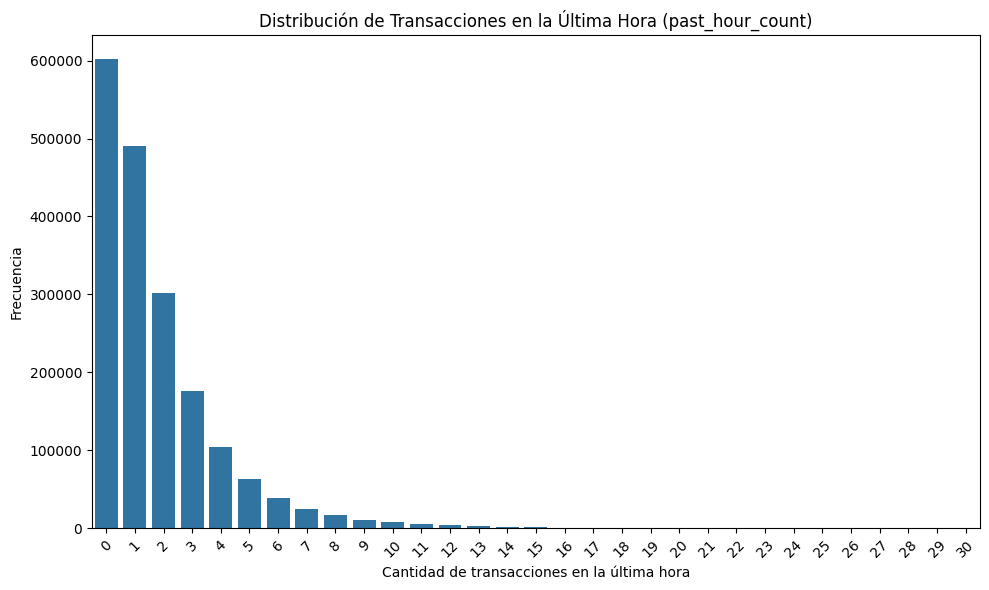

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de valores ordenados
plt.figure(figsize=(10, 6))
sns.countplot(x='past_hour_count', data=df, order=df['past_hour_count'].value_counts().index)
plt.title('Distribución de Transacciones en la Última Hora (past_hour_count)')
plt.xlabel('Cantidad de transacciones en la última hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import numpy as np

# Asegúrate de que la columna de tiempo sea datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Ordenar por tarjeta y por tiempo de transacción
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

# ---------------------------------------------
# 1. Número de transacciones diarias por tarjeta
# ---------------------------------------------
df['daily_tx_count'] = df.groupby(['cc_num', df['trans_date_trans_time'].dt.date])['trans_num'].transform('count')

# ------------------------------------------------
# 2. Tiempo desde la transacción anterior (minutos)
# ------------------------------------------------
df['time_diff_min'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().div(60).fillna(0)

# --------------------------------------------
# 3. Diferencia en monto con respecto a la anterior
# --------------------------------------------
df['amt_diff'] = df.groupby('cc_num')['amt'].diff().fillna(0)

# --------------------------------------------
# 4. Segmento horario (tramos de 4 horas)
# --------------------------------------------
df['hour_segment'] = df['hour'] // 4  # 0: 0-3, 1: 4-7, ..., 5: 20-23

# ------------------------------------------------------
# 5. Cantidad de cambios de categoría por tarjeta y día
# ------------------------------------------------------
df['category_shift'] = df.groupby(['cc_num', df['trans_date_trans_time'].dt.date])['category'].shift()
df['category_sequence_change'] = (df['category'] != df['category_shift']).astype(int)
df['category_sequence_count'] = df.groupby(['cc_num', df['trans_date_trans_time'].dt.date])['category_sequence_change'].cumsum()

# ----------------------------------------------------------------
# 6. Comercios únicos visitados por tarjeta en el día (acumulado)
# ----------------------------------------------------------------

# Crear una función para contar comerciantes únicos acumulados
def expanding_unique_count(series):
    seen = set()
    result = []
    for val in series:
        seen.add(val)
        result.append(len(seen))
    return pd.Series(result, index=series.index)

# Aplicar la función por tarjeta y día
df['merchant_sequence_count'] = (
    df.groupby(['cc_num', df['trans_date_trans_time'].dt.date])['merchant']
    .apply(expanding_unique_count)
    .reset_index(level=[0,1], drop=True)
)

# Eliminar columnas temporales si no se van a usar más
df.drop(columns=['category_shift', 'category_sequence_change'], inplace=True)


## Variables generadas para detectar patrones secuenciales de fraude

1. **`daily_tx_count`**: Número de transacciones por tarjeta en un mismo día. 
   - Utilidad: identifica usuarios con comportamientos inusuales en un corto período.

2. **`time_diff_min`**: Tiempo en minutos desde la transacción anterior del mismo usuario.
   - Utilidad: si hay muchas transacciones muy cercanas entre sí, puede ser señal de automatización o uso fraudulento.

3. **`amt_diff`**: Diferencia en la cantidad gastada respecto a la transacción anterior.
   - Utilidad: puede detectar si hay un aumento abrupto o comportamiento irregular en el gasto.

4. **`hour_segment`**: Segmento de hora del día en tramos de 4 horas.
   - Utilidad: ayuda a capturar patrones como fraude recurrente en madrugada o fuera de horas comunes.

5. **`category_sequence_count`**: Número de cambios en la categoría de comercio dentro del mismo día.
   - Utilidad: cambios frecuentes de categoría pueden indicar pruebas delictivas o comportamiento errático.

6. **`merchant_sequence_count`**: Número de comercios distintos visitados por tarjeta en un mismo día.
   - Utilidad: múltiples comercios diferentes en corto plazo pueden ser señal de tarjeta robada usada en cadena.

Estas variables ayudan a construir modelos que no solo evalúan transacciones individuales, sino también **el contexto secuencial**, fundamental para la función objetivo: *"Detección de patrones secuenciales de fraude"*.


In [19]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,is_night,trans_date_trans_time,past_hour_count,trans_day_date,daily_tx_count,time_diff_min,amt_diff,hour_segment,category_sequence_count,merchant_sequence_count
0,60416207185,fraud_Conroy-Cruickshank,gas_transport,64.31,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,0,2019-01-01 08:00:00,0,2019-01-01,16,0.0,0.00,2,1,1
1,60416207185,fraud_Vandervort-Funk,grocery_pos,72.81,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,0,2019-01-01 10:00:00,0,2019-01-01,16,120.0,8.50,2,2,2
2,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,0,2019-01-01 12:00:00,0,2019-01-01,16,120.0,-65.54,3,3,3
3,60416207185,"fraud_Kuhic, Bins and Pfeffer",shopping_net,204.15,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,0,2019-01-01 12:00:00,1,2019-01-01,16,0.0,196.88,3,4,4
4,60416207185,fraud_Pacocha-Weissnat,kids_pets,16.20,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,0,2019-01-01 12:00:00,2,2019-01-01,16,0.0,-187.95,3,5,5


In [20]:
df.to_csv("Caracteristicas_final.csv", index=False)
